###목표
- iris 품종 예측 다중분류 문제를 신경망으로 풀어보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn에서 지원해주는 학습용 유방암 데이터셋 임포트
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
X = data['data']
y = data['target']

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [21]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 정답 데이터 인코딩
# 신경망 출력층에서 각 클래스 값들에 대한 확률값과 비교하여
# 정확한 오차를 구하기 위해서 정답의 범위도 0~1사이 값으 변환시켜줘야함

In [9]:
y_one_hot = pd.get_dummies(y)
y_one_hot

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=55)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [13]:
# 1. 신경망 구조 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [82]:
model = Sequential()

model.add(Dense(50, input_dim=4, activation='sigmoid'))

# 중간층
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

# 출력층
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 50)                250       
                                                                 
 dense_65 (Dense)            (None, 100)               5100      
                                                                 
 dense_66 (Dense)            (None, 50)                5050      
                                                                 
 dense_67 (Dense)            (None, 10)                510       
                                                                 
 dense_68 (Dense)            (None, 3)                 33        
                                                                 
Total params: 10,943
Trainable params: 10,943
Non-trainable params: 0
_________________________________________________________________


In [83]:
# 2. 학습 및 평가방법 설정
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['acc']
)

In [84]:
# 3. 학습 및 시각화
h = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 1.3988 - acc: 0.3250
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.3013 - acc: 0.3250
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2248 - acc: 0.3250
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1749 - acc: 0.3250
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1403 - acc: 0.3250
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1201 - acc: 0.3250
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1085 - acc: 0.3250
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1014 - acc: 0.3250
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0985 - acc: 0.3250
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0965 - acc: 0.3833
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0965 

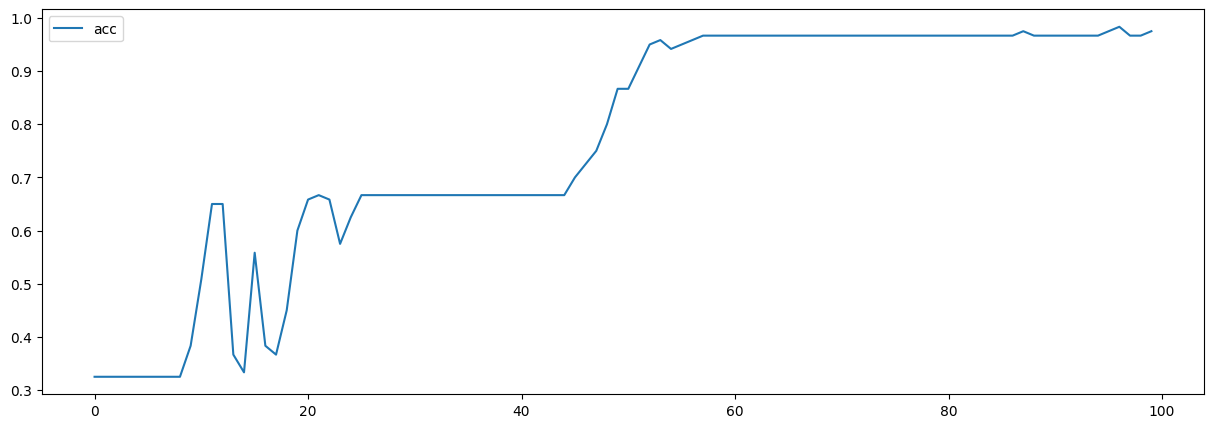

In [85]:
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')

plt.legend()
plt.show()

In [86]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 176ms/step - loss: 0.2339 - acc: 0.9667


[0.2338758260011673, 0.9666666388511658]